In [1]:
import pybamm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
options = {
    'operating mode': 'current'
    }
chemistry = pybamm.parameter_sets.Chen2020
parameters = pybamm.ParameterValues(chemistry=chemistry)

parameters.update(
    {
        "Cation transference number": 1.0,
        # "Positive electrode conductivity [S.m-1]": 0.20,
        # "Negative electrode conductivity [S.m-1]": 0.20,
        "Electrode cross-sectional area [m2]": 1e-4,
        "Positive electrode active material volume fraction": 0.70,
        "Negative electrode active material volume fraction": 0.70,
        'Positive electrode thickness [m]': 100e-06,
        "Negative electrode thickness [m]": 100e-6,
        "Separator thickness [m]": 50e-6,
        "Positive electrode porosity": 0.30,
        "Negative electrode porosity": 0.30,
        "Separator porosity": 1.0,
        "Positive particle radius [m]": 5e-6,
        "Negative particle radius [m]": 5e-6,
    },
    check_already_exists=False,
)

experiment = pybamm.Experiment(
    [
        (
            "Discharge at C/10 for 10 hours or until 3.5 V",
            "Rest for 1 hour",
            "Charge at 1 A until 4.1 V",
            "Hold at 4.1 V until 50 mA",
            "Rest for 1 hour"),
    ]
)
model = pybamm.lithium_ion.DFN(options=options)
sim = pybamm.Simulation(model=model, experiment=experiment, parameter_values=parameters)
sim.solve()

In [3]:
terminal_voltage = sim.solution['Terminal voltage [V]'].entries
current_density = sim.solution["Current collector current density [A.m-2]"].entries
time = sim.solution["Time [h]"].entries
pos_ocp = sim.solution["X-averaged positive electrode open circuit potential [V]"].entries
neg_ocp = sim.solution["X-averaged negative electrode open circuit potential [V]"].entries


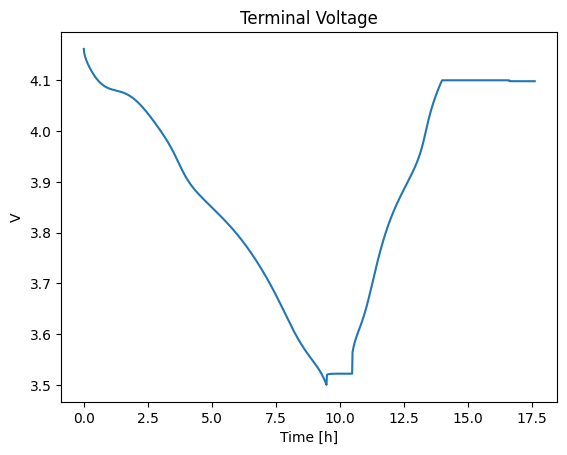

In [4]:
plt.plot(time, terminal_voltage)
plt.xlabel("Time [h]")
plt.ylabel("V")
plt.title("Terminal Voltage")
plt.show()

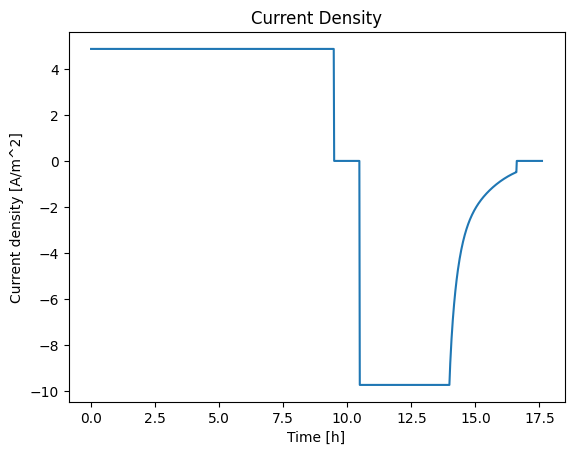

In [5]:
plt.plot(time, current_density)
plt.xlabel("Time [h]")
plt.ylabel(r'Current density [A/m^2]')
plt.title("Current Density")
plt.show()

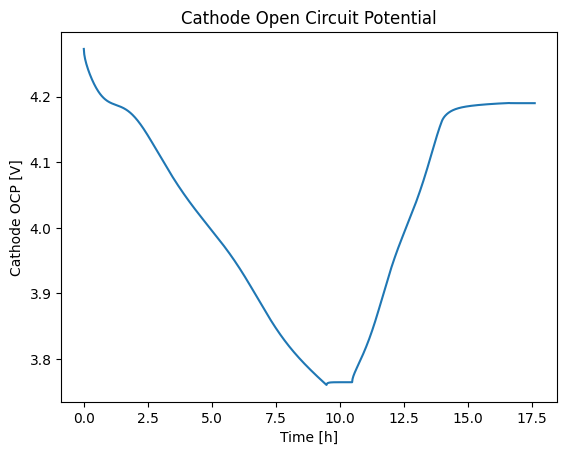

In [6]:
plt.plot(time, pos_ocp)
plt.xlabel("Time [h]")
plt.ylabel(r'Cathode OCP [V]')
plt.title("Cathode Open Circuit Potential")
plt.show()

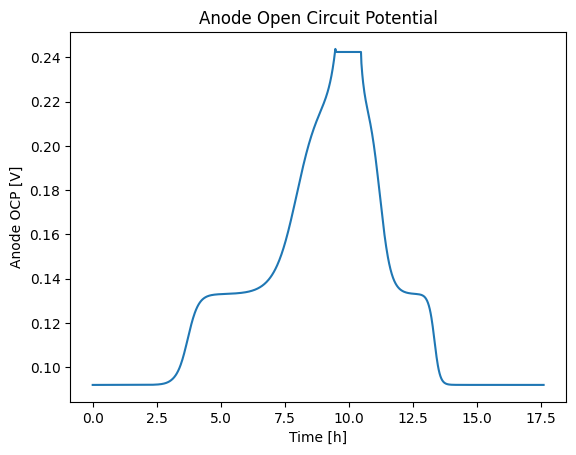

In [7]:
plt.plot(time, neg_ocp)
plt.xlabel("Time [h]")
plt.ylabel(r'Anode OCP [V]')
plt.title("Anode Open Circuit Potential")
plt.show()

In [8]:
model.variables.search('[m]')
# (parameters["Negative electrode conductivity [S.m-1]"],
# parameters["Positive electrode conductivity [S.m-1]"])
# sim.plot(["Electrolyte current density"])

Dead lithium thickness [m]
Inner SEI on cracks thickness [m]
Inner SEI thickness [m]
Lithium plating thickness [m]
Negative particle crack length [m]
Negative particle radius [m]
Outer SEI on cracks thickness [m]
Outer SEI thickness [m]
Positive particle crack length [m]
Positive particle radius [m]
SEI [m]
SEI on cracks [m]
Total SEI on cracks thickness [m]
Total SEI thickness [m]
X-averaged SEI on cracks thickness [m]
X-averaged SEI thickness [m]
X-averaged dead lithium thickness [m]
X-averaged inner SEI on cracks thickness [m]
X-averaged inner SEI thickness [m]
X-averaged lithium plating thickness [m]
X-averaged negative particle crack length [m]
X-averaged outer SEI on cracks thickness [m]
X-averaged outer SEI thickness [m]
X-averaged positive particle crack length [m]
X-averaged total SEI on cracks thickness [m]
X-averaged total SEI thickness [m]
r_n [m]
r_p [m]
x [m]
x_n [m]
x_p [m]
x_s [m]


In [9]:
sim.plot(["Positive electrode current density [A.m-2]"])

interactive(children=(FloatSlider(value=0.0, description='t', max=17.598458406338686, step=0.17598458406338685…

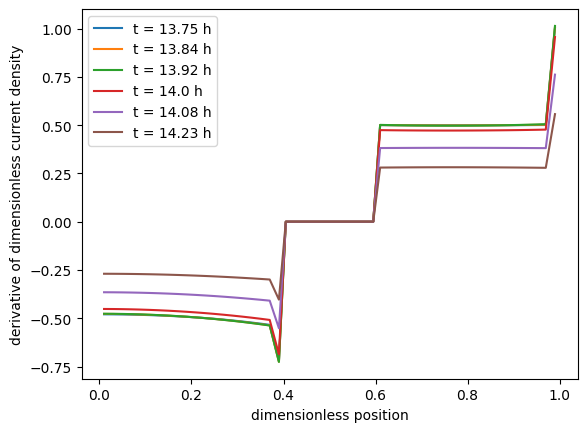

In [10]:
pos_current_density = sim.solution['Electrolyte current density'].entries
x_position = sim.solution['x [m]'].entries
t_min = 13.75
t_max = 14.25

time_ids = np.where(np.less_equal(time, t_max) & np.greater_equal(time, t_min))[0]
time_range = time[time_ids]
current_density_for_time_range = pos_current_density[:, time_ids]
position = np.zeros(61)
position[:60] = x_position[:, 0]
position[60] = 0.0002500
non_dim_position = position / 0.0002500

for id in [0, 5, 10, 15, 20, 29]:
    time = time_range[id]
    current_density_vals = current_density_for_time_range[:, id]
    derivative_curr_density = np.divide(current_density_vals[1:] - current_density_vals[:-1], non_dim_position[1:] - non_dim_position[:-1])
    plt.plot(non_dim_position[:-1], derivative_curr_density, label='t = {} h'.format(round(time, 2)))
plt.legend()
plt.xlabel('dimensionless position')
plt.ylabel("derivative of dimensionless current density")
plt.show()